In [27]:
# Baseline model, doing logistic regression on the data
# Import pandas and sklearn

import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split


In [28]:
df = pd.read_csv('data/train.csv')

# Split the data into training and testing data
# X = df.drop(['Exited', 'Surname', 'CustomerId', 'Gender', 'Geography'], axis=1)
df['SurnameLen'] = df['Surname'].apply(lambda x: len(x))
X_raw = df.drop(['Exited', 'Surname', 'CustomerId'], axis=1)

In [29]:
X_raw.describe()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,SurnameLen
count,165034.0000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,6.543179
std,47641.3565,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,2.614270
min,0.0000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,2.000000
25%,41258.2500,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,5.000000
50%,82516.5000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,6.000000
75%,123774.7500,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,8.000000
max,165033.0000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,23.000000


In [30]:
# Exploratory data Analysis

# Check for missing values
X_raw.isnull().sum()




id                 0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
SurnameLen         0
dtype: int64

In [31]:
# Check for unique values
X_raw.nunique()

id                 165034
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
SurnameLen             18
dtype: int64

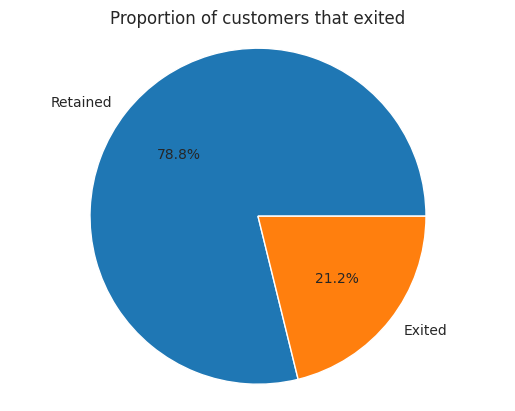

In [32]:

# Check for the distribution of the target variable
df['Exited'].value_counts()

# Plot this in a pie chart using pyplot
import matplotlib.pyplot as plt

labels = 'Retained', 'Exited'
sizes = df['Exited'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Proportion of customers that exited')
plt.show()



<Axes: ylabel='count'>

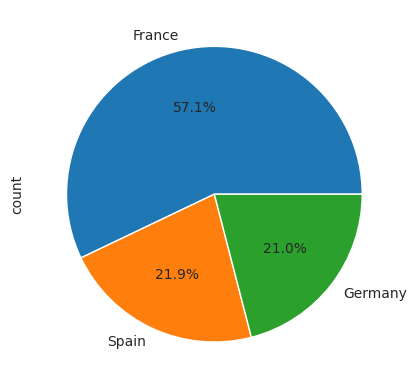

In [33]:
X_raw["Geography"].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define column names for categorical and numeric columns
columns_to_drop = ['CustomerId', 'Surname', 'Id']
categorical_columns = ['Gender', 'Geography']
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary']

# For exploration only
numeric_columns.append('Exited')

# Create the column preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(categories='auto'), categorical_columns)
    ], remainder='passthrough')

In [35]:
# Apply ColumnTransformer on X_raw, and set it as a dataframe
X = pd.DataFrame(preprocessor.fit_transform(df))

In [36]:
# Rename the columns
# Get the names of the columns
column_names = preprocessor.get_feature_names_out()
X.columns = column_names

In [37]:
X.drop(['remainder__id', 'remainder__Surname'], axis=1, inplace=True)

In [38]:
X = X.convert_dtypes()

In [39]:
X.dtypes

ohe__Gender_Female              Int64
ohe__Gender_Male                Int64
ohe__Geography_France           Int64
ohe__Geography_Germany          Int64
ohe__Geography_Spain            Int64
remainder__CustomerId           Int64
remainder__CreditScore          Int64
remainder__Age                Float64
remainder__Tenure               Int64
remainder__Balance            Float64
remainder__NumOfProducts        Int64
remainder__HasCrCard            Int64
remainder__IsActiveMember       Int64
remainder__EstimatedSalary    Float64
remainder__Exited               Int64
remainder__SurnameLen           Int64
dtype: object

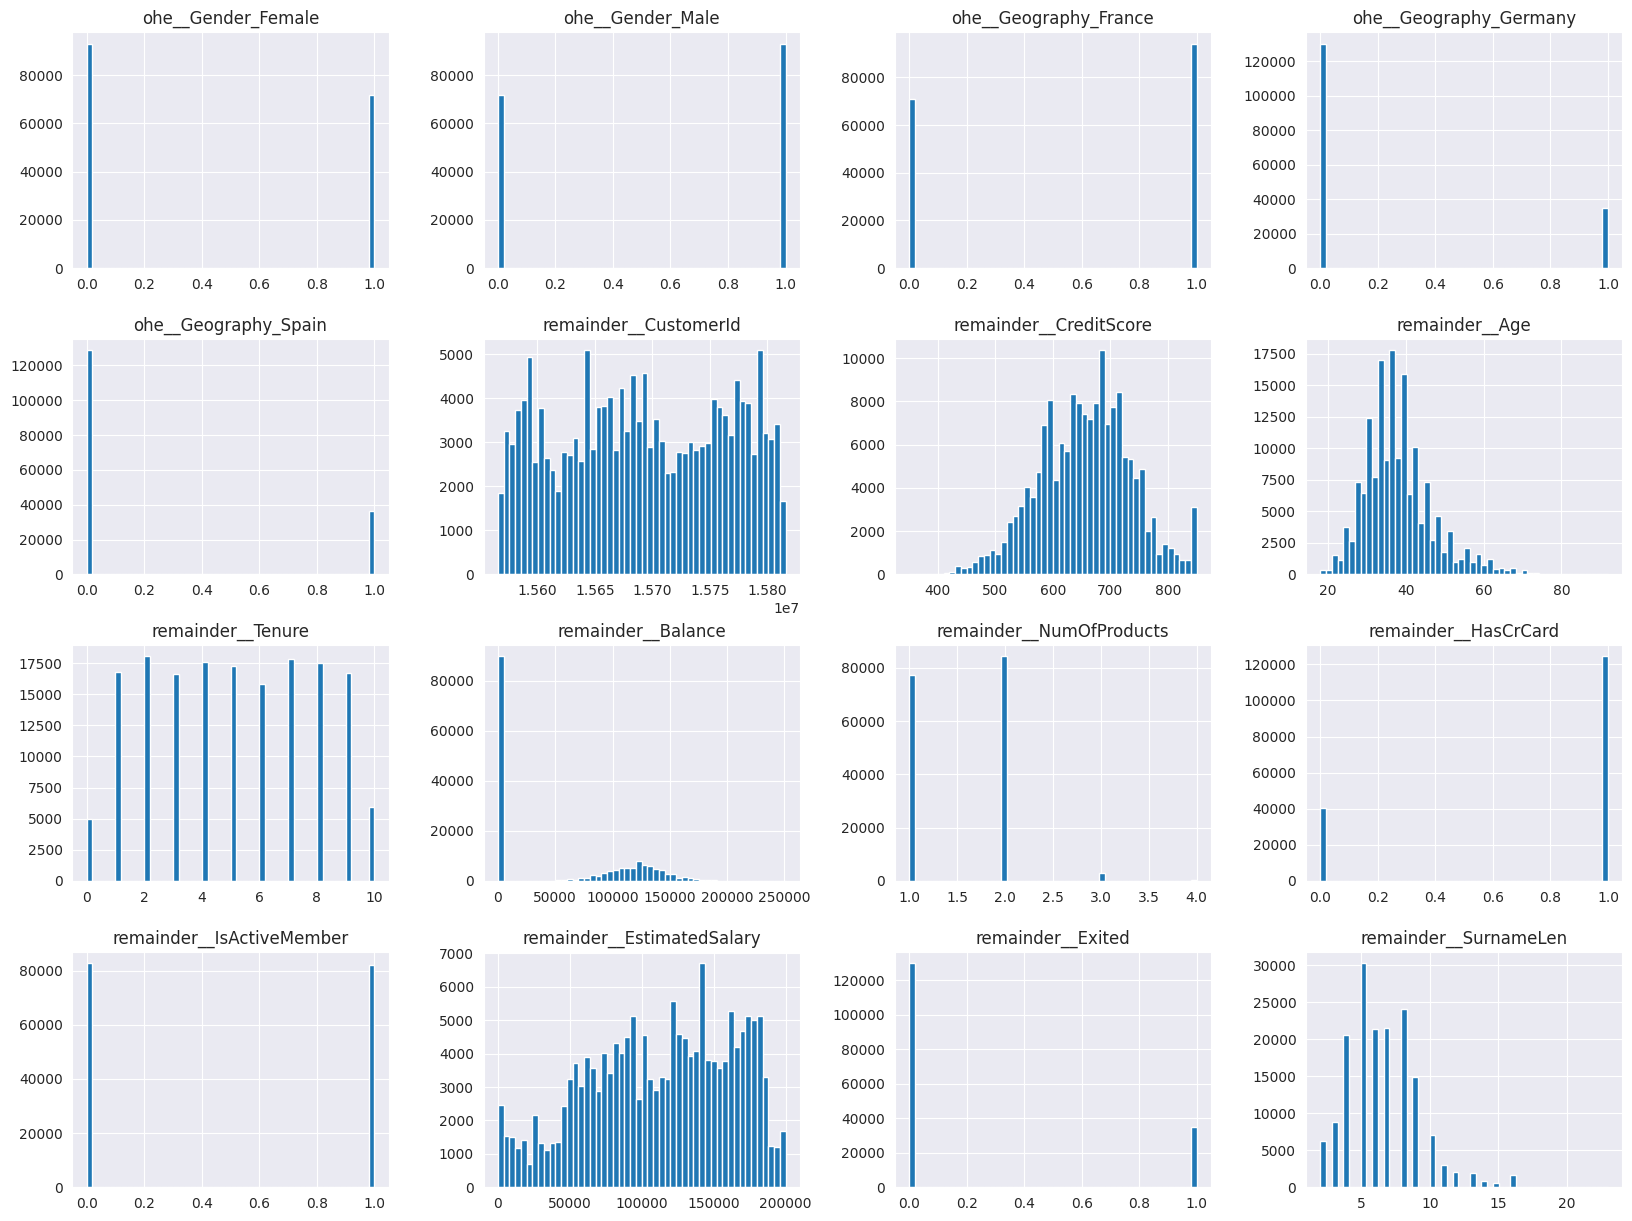

In [40]:
import numpy as np
# Show distributions of numerical variables

# Plot histogram
X.hist(bins=50, figsize=(20, 15))
# X.hist(bins=50, figsize=(20, 15))
plt.show()




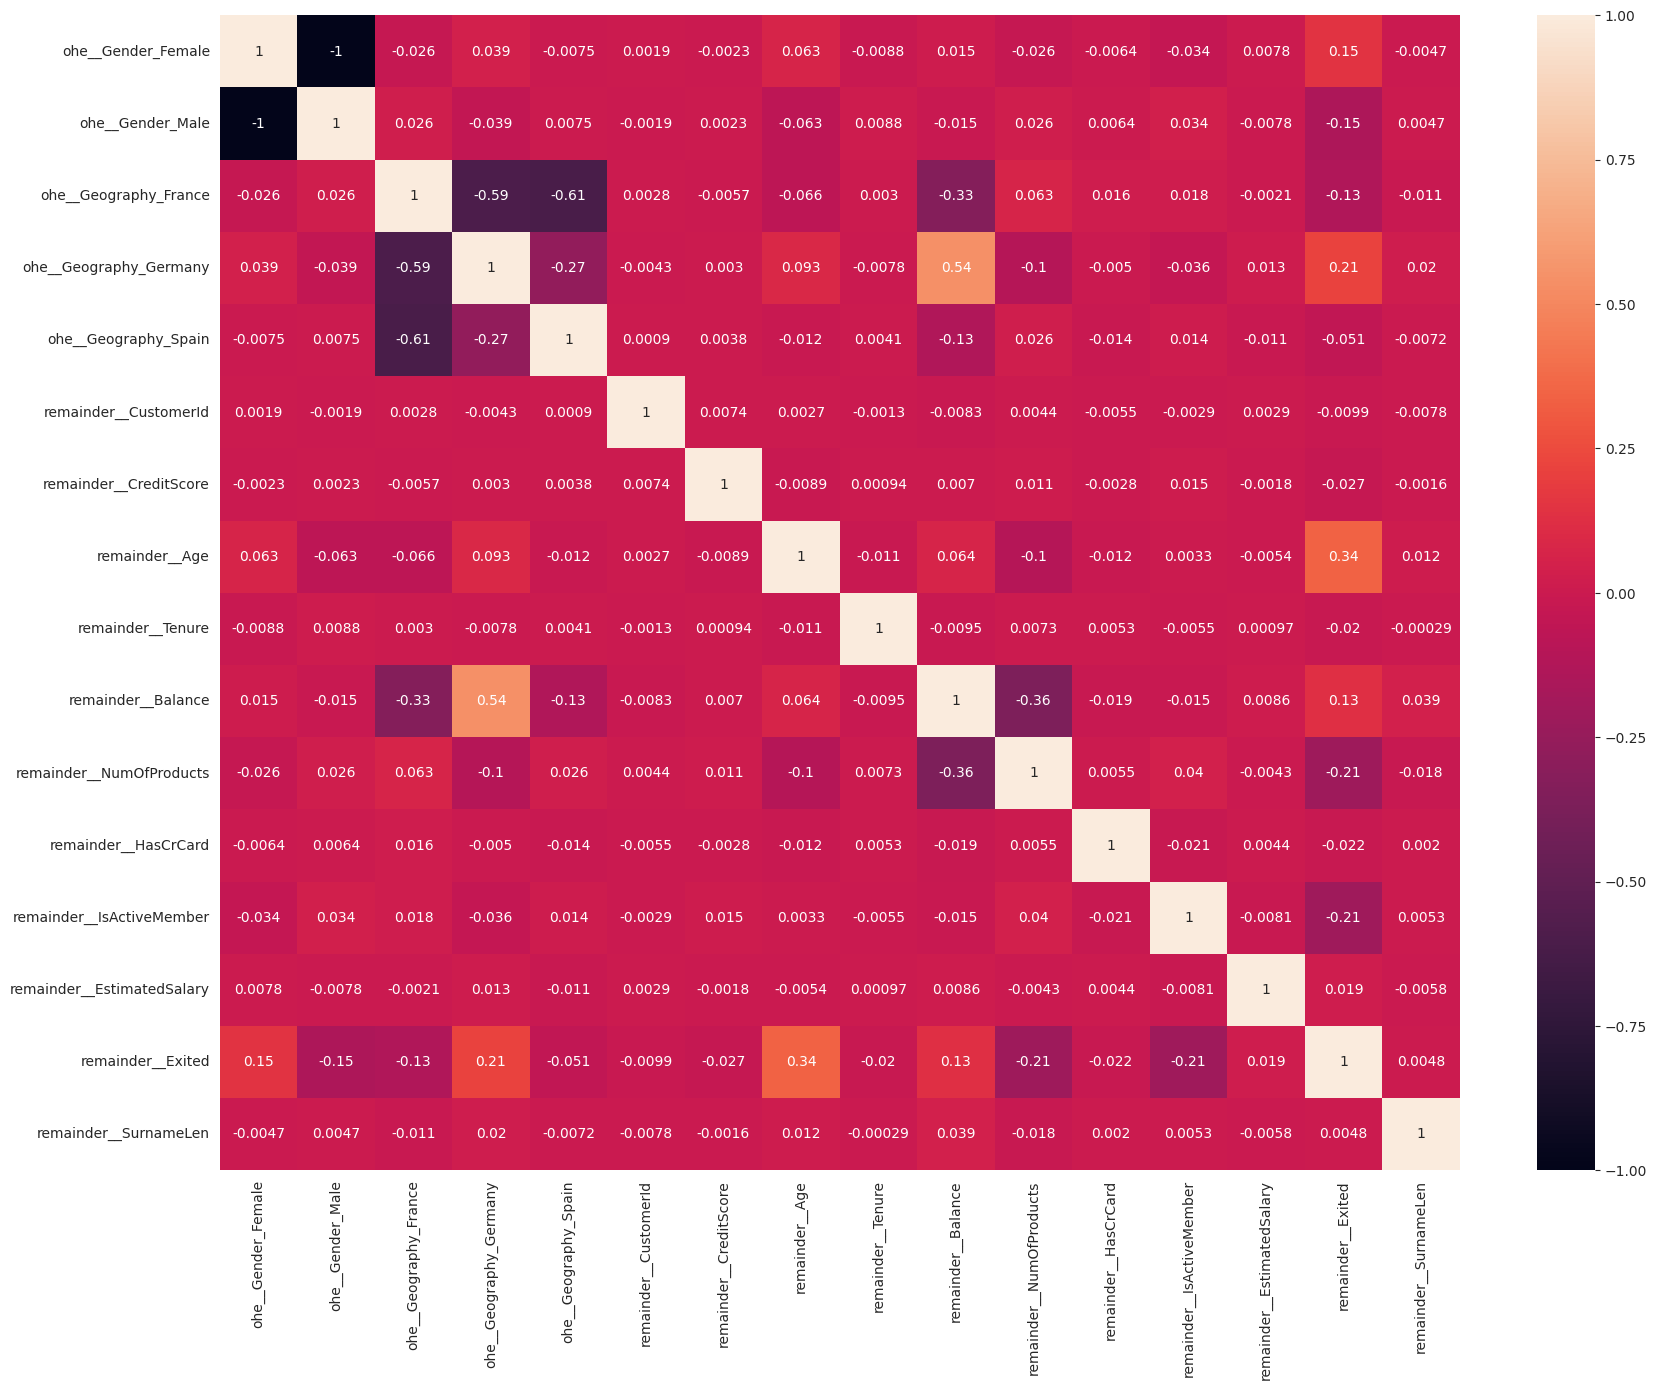

In [41]:
# Check for the correlation between the variables using pyplot

import seaborn as sns

# Select numeric columns from X
numeric_columns = X.select_dtypes(include=[np.number])


correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()



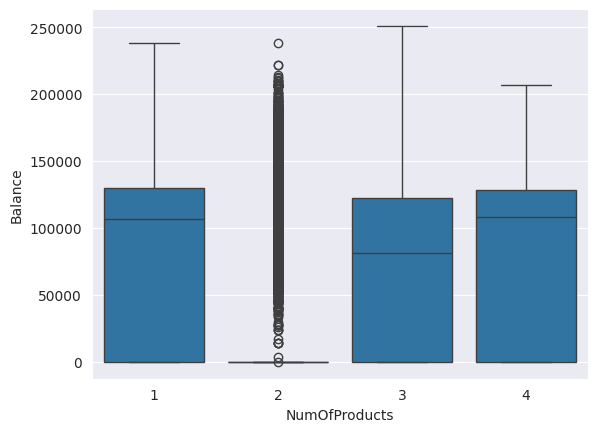

' The -0.36 correlation comes from the fact that a majority of the customers that have 2 \nproducts have a balance of 0 as compared to the other customers like those with 1 product have a proper distribution of balance. \nMost customers have one or two products, that is why data points where customers have 3 or 4 products have a small effect on the correlation.\n'

In [42]:

# Bar and whisker plot Balance vs NumOfProducts

sns.boxplot(x='NumOfProducts', y='Balance', data=X_raw)
plt.show()

""" The -0.36 correlation comes from the fact that a majority of the customers that have 2 
products have a balance of 0 as compared to the other customers like those with 1 product have a proper distribution of balance. 
Most customers have one or two products, that is why data points where customers have 3 or 4 products have a small effect on the correlation.
"""

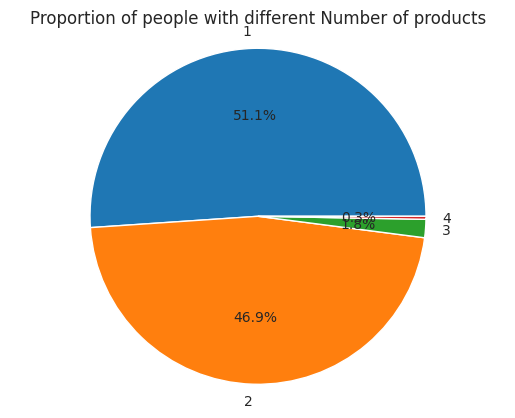

In [43]:
# Make pie chart of number of people with different number of products
labels = '1', '2', '3', '4'
sizes = X_raw['NumOfProducts'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Proportion of people with different Number of products')
plt.show()

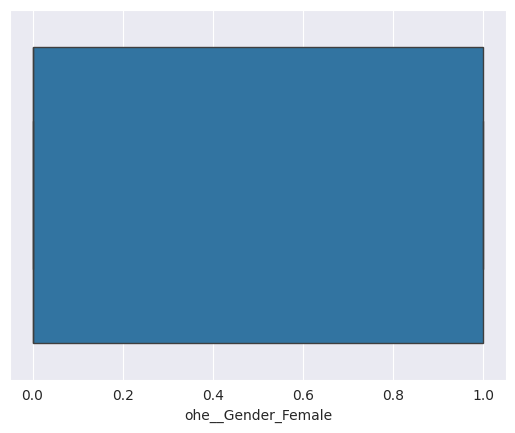

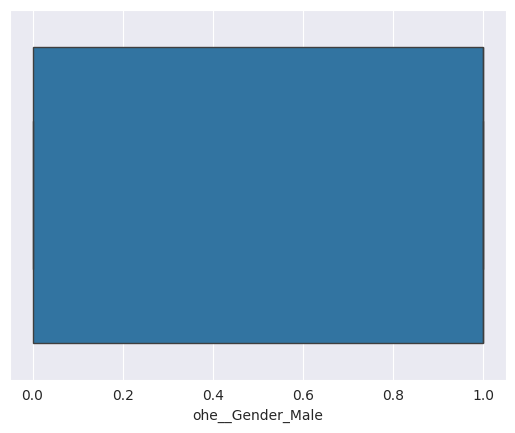

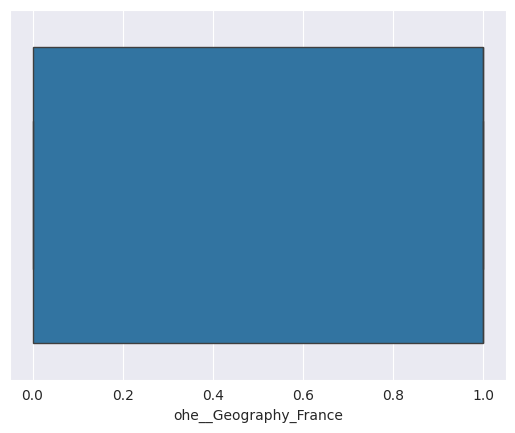

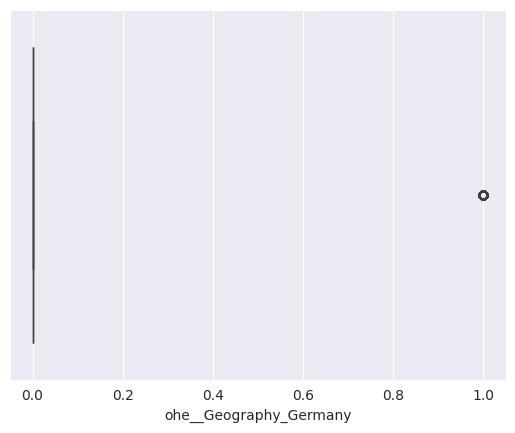

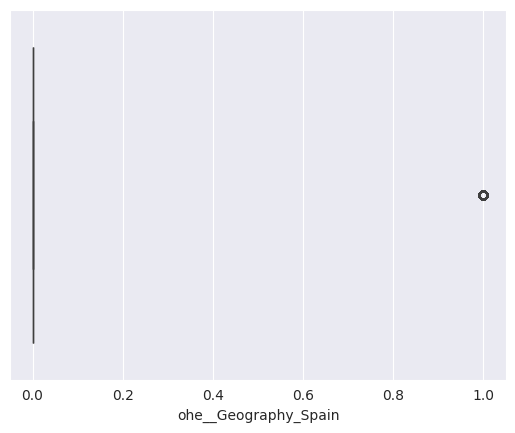

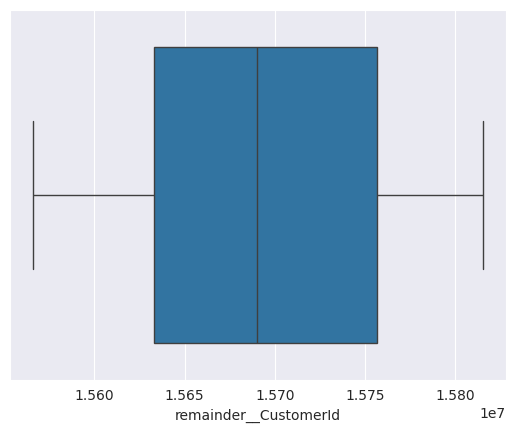

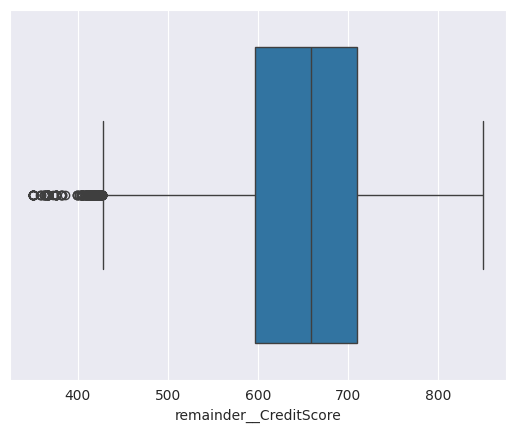

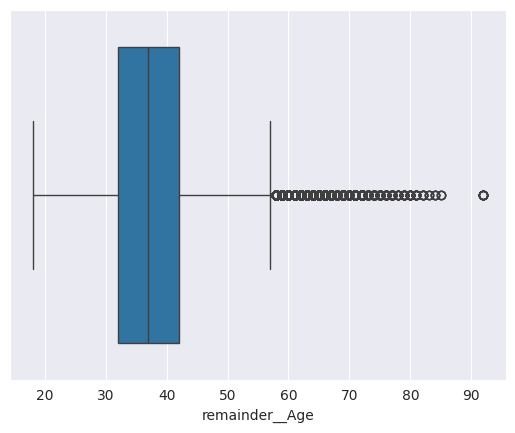

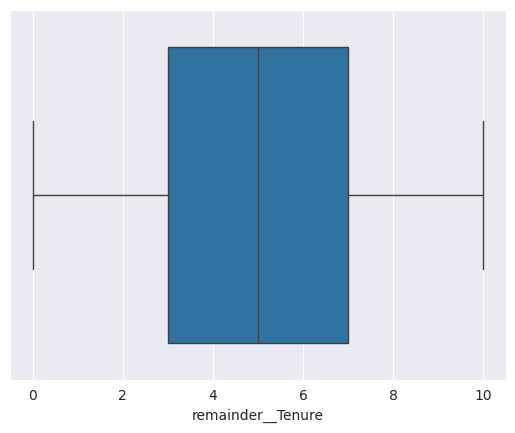

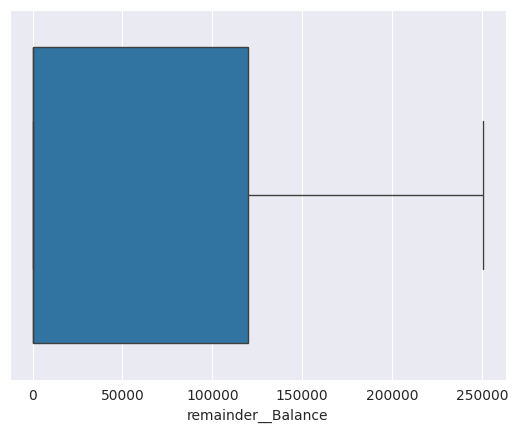

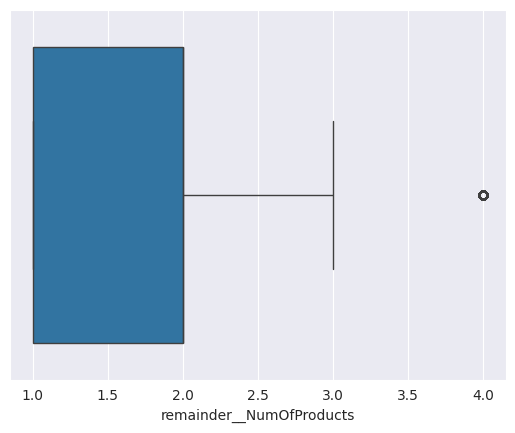

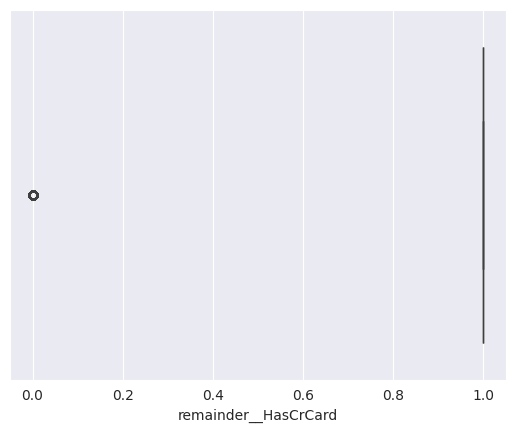

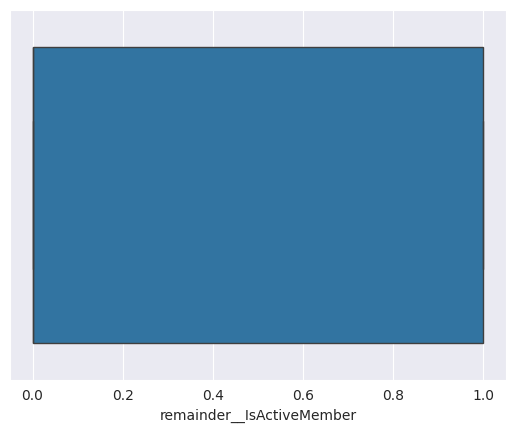

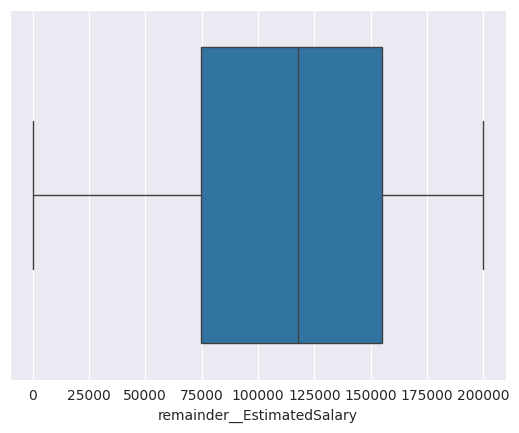

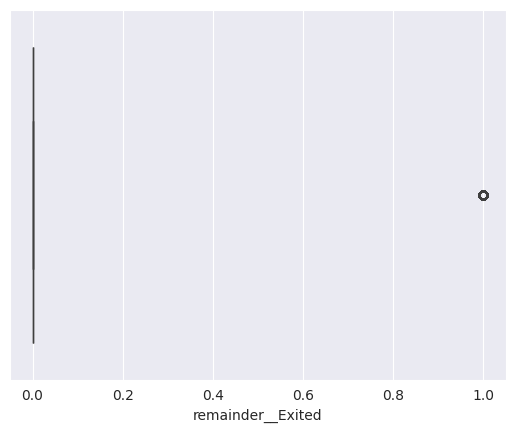

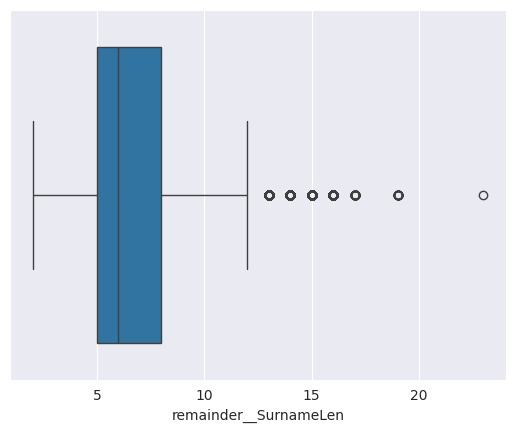

In [44]:
# Let's take a look at outliers
# Box and whisker plot using seaborn for each column
for column in X.columns:
    sns.boxplot(x=X[column])
    plt.show()


# Baseline model

In [45]:

y = df['Exited']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, stratify=y, random_state=42)


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define column names for categorical and numeric columns
columns_to_drop = ['CustomerId']
categorical_columns = ['Gender', 'Geography']
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary']

# Create the column preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(categories='auto'), categorical_columns),
        ('std_scaler', StandardScaler(), numeric_columns)
    ])

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestClassifier())
])

# Fit the pipeline to the data
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Gender', 'Geography']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('random_forest', RandomForestClassifier())])

In [48]:
# Classes
pipe[:-1].get_feature_names_out()

array(['ohe__Gender_Female', 'ohe__Gender_Male', 'ohe__Geography_France',
       'ohe__Geography_Germany', 'ohe__Geography_Spain',
       'std_scaler__CreditScore', 'std_scaler__Age', 'std_scaler__Tenure',
       'std_scaler__Balance', 'std_scaler__NumOfProducts',
       'std_scaler__HasCrCard', 'std_scaler__IsActiveMember',
       'std_scaler__EstimatedSalary'], dtype=object)

In [49]:
# Make predictions
y_pred = pipe.predict(X_test)

Accuracy:  0.8574241827491138
ROC AUC:  0.7389834132762721
Precision/Recall AUC:  0.7389834132762721
Confusion matrix:  [[24574  1449]
 [ 3257  3727]]


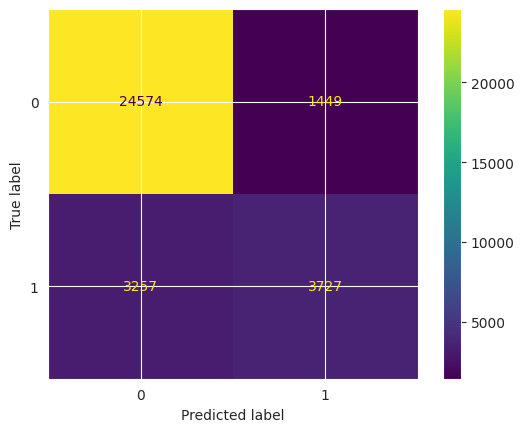

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC: ", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
pr_auc = auc(fpr, tpr)
print("Precision/Recall AUC: ", pr_auc)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ", conf_matrix)
conf_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                   display_labels=pipe.classes_)
conf_plot.plot()
plt.show()

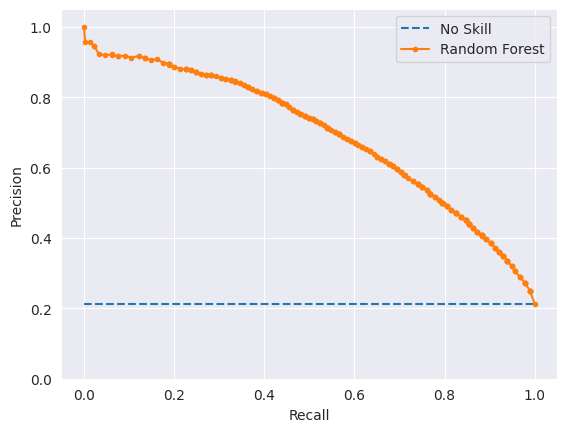

In [51]:
# Plot precision recall curves
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# predict probabilities
y_pred_proba = pipe.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = y_pred_proba[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y == 1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# Set y to be between 0 and 1
pyplot.ylim([0.0, 1.05])
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

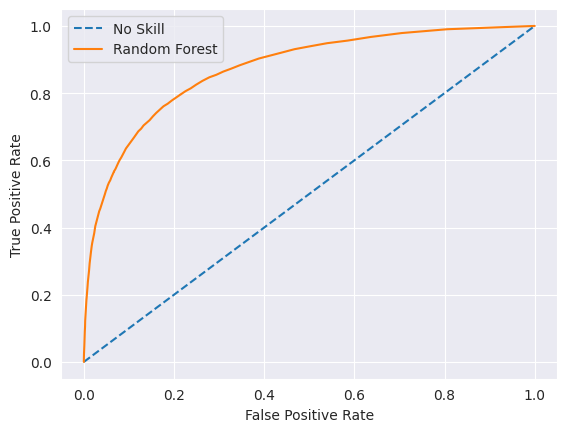

In [52]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

y_pred_proba = pipe.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = y_pred_proba[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
#  marker='.',
pyplot.plot(fpr, tpr, label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
